In [27]:
"""
Name: Pradip Rajendra Warkhade
Class: TYIT
Roll No: 64
Sub: Machine Learning Lab
PRN: UIT21M1069
"""

'\nName: Pradip Rajendra Warkhade\nClass: TYIT\nRoll No: 64\nSub: Machine Learning Lab\nPRN: UIT21M1069\n'

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [45]:
data = pd.read_csv( "sales1.csv" )
data.head()

,TV,Radio,Socialmedia,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181


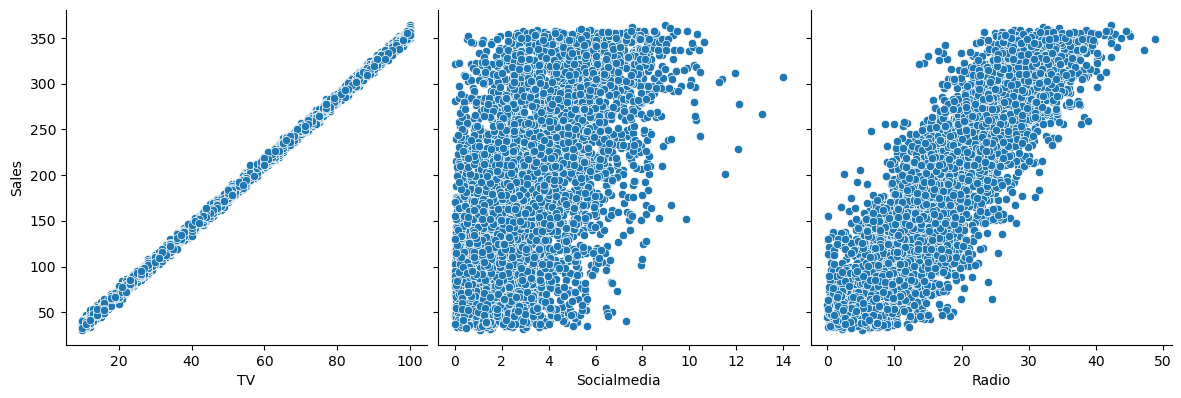

In [46]:
import seaborn as sns
sns.pairplot(data, x_vars=[ 'TV', 'Socialmedia','Radio' ], y_vars = 'Sales', size = 4, kind = 'scatter' )
plt.show()

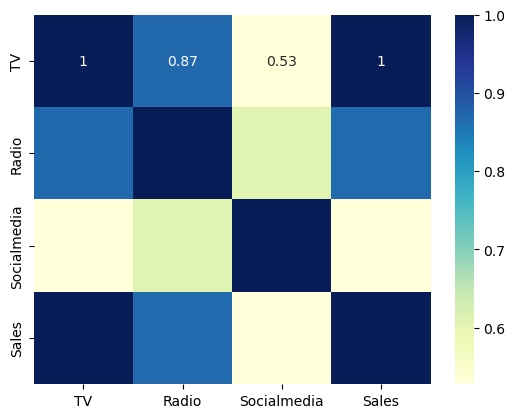

In [47]:
sns.heatmap( data.corr(), cmap = 'YlGnBu', annot = True )
plt.show()

In [48]:
X = data[ 'Socialmedia' ]
y = data[ 'Sales' ]

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.7, test_size = 0.3, random_state = 100 )
print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )

(3182,)
(1364,)
(3182,)
(1364,)


In [50]:
data.loc[data.isna().any(axis="columns")]

,TV,Radio,Socialmedia,Sales


In [43]:
# Replace empty strings with NaN
data.replace('', pd.NA, inplace=True)

# Drop rows where all values are NaN
data.dropna(how='all', inplace=True)

# Replace empty strings with NaN
data.replace('', pd.NA, inplace=True)

# Drop rows where any value is NaN
data.dropna(how='any', inplace=True)

In [44]:
data.to_csv('clean_data.csv', index=False)

In [51]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const          117.497264
Socialmedia     22.927954
dtype: float64

In [52]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     1329.
Date:                Tue, 26 Mar 2024   Prob (F-statistic):          1.71e-243
Time:                        15:57:30   Log-Likelihood:                -18397.
No. Observations:                3182   AIC:                         3.680e+04
Df Residuals:                    3180   BIC:                         3.681e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         117.4973      2.520     46.630      